### Importing Necessary Libraries

In [1]:
# Import necessary libraries

import torch
import torch.nn as nn
import torch.nn.functional as F


In [2]:
# Imports for loading data

from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

In [3]:
# Importing other libraries

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the MNIST dataset

In [4]:
# Create tranform to convert image to tensor
transform = transforms.ToTensor()

In [5]:
# Load MNIST training dataset
train_data = datasets.MNIST(root = './', train = True, download = True, transform = transform)

In [6]:
# Load MNIST testing dataset
test_data = datasets.MNIST(root = './', train = False, download = True, transform = transform)

### Observing the dataset

In [7]:
# Check the training data
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
# Check the testing data
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./
    Split: Test
    StandardTransform
Transform: ToTensor()

In [9]:
# Observing train_data

type(train_data)

torchvision.datasets.mnist.MNIST

In [10]:
train_data[0]
type(train_data[0])

tuple

We can see that the first element of *train_data* is tuple consisting the image tensors and the image labels.

In [11]:
# Check the image tensor
train_data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

The first item of the tuple is the 28*28 image tensor.

In [12]:
# Check the image label
train_data[0][1]

5

The label says that the image represented by above tensor is the handwritten number 5.

In [13]:
image, label = train_data[0]

In [14]:
image.shape

torch.Size([1, 28, 28])

The reason that the shape of our dataset is 1x28x28 is because the image is of pixel size 28x28 and the image we have is grayscale image (Hence, only one channel). 

In [15]:
label

5

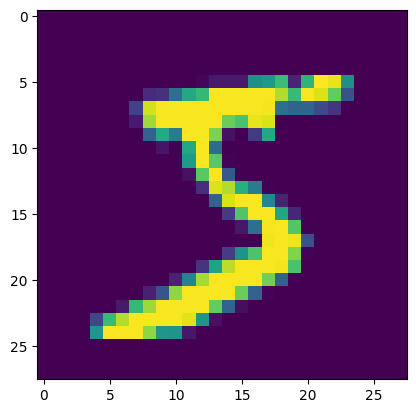

In [16]:
# Visualizing tensor with matplotlib
plt.imshow(image.reshape(28,28))

The actual image we have is grayscale image but becauase of matplotlib's default color mapping, we are getting a colored version.

We can also view this image in grayscale by manually providing color mapping.

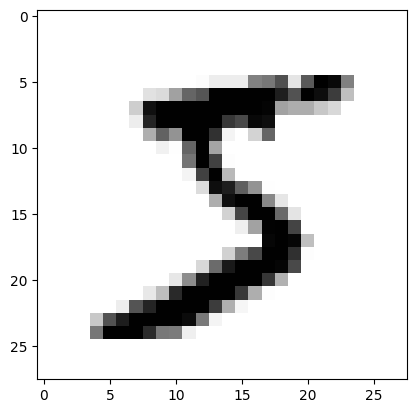

In [17]:
plt.imshow(image.reshape(28,28), cmap = 'gist_yarg')

### Creating DataLoader to load data in batches.

In [18]:
# Setting a random seed

torch.manual_seed(101)

# The initial seed can be any arbitrary number 

In [19]:
# Loading data using TrainLoader

train_loader = DataLoader(train_data, batch_size = 10, shuffle = True)

test_loader = DataLoader(test_data, batch_size = 10, shuffle = False)

In [20]:
# Inspecting dataset from dataloader

from torchvision.utils import make_grid
np.set_printoptions(formatter = dict(int = lambda x: f'{x:4}'))

In [21]:
# First Batch

for images, labels in train_loader:
  break

In [22]:
images.shape

torch.Size([10, 1, 28, 28])

In [23]:
labels.shape

torch.Size([10])

Labels :  [   7    2    3    5    8    5    3    6    9    9]


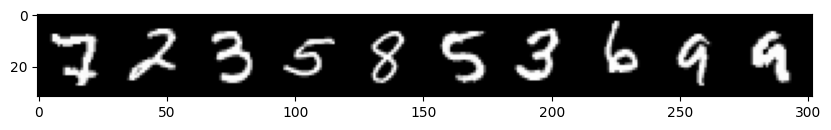

In [24]:
# Print the first 12 labels
print('Labels : ', labels[:].numpy())

# Print the first 12 images
im = make_grid(images[:], nrow = 10)
plt.figure(figsize = (10, 4))

# We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)), cmap = 'gray')

### Convolutional Layer (*PRACTICE only*)

In [25]:
# Defining convolution layer

conv1 = nn.Conv2d(1, 6, 3, 1)  # 1 input -----> 6 Filters -----> Pooling -----> conv2

'''
First Parameter '1' is for color channel
Second Parameter '6' is for Filters (Output Channels)
Third Parameter '3' represents the kernel_size (i.e. 3x3)
and the last parameter represents the stride 1
'''

conv2 = nn.Conv2d(6, 16, 3, 1)  # 6 input filters from conv1 -----> 16 Filters -----> Pooling ----->

In [26]:
# Take a single image, like a batch of image and apply some convolution to see what is happening
for i, (X_train, y_train) in enumerate(train_data):
  break 

In [27]:
X_train.shape

torch.Size([1, 28, 28])

In [28]:
# Reshaping X_train
x = X_train.view(1, 1, 28, 28)

In [29]:
x.shape  # ----->4D Batch (batch of 1 image)

torch.Size([1, 1, 28, 28])

In [30]:
# Appalying first convolution layer
x = F.relu(conv1(x))

In [31]:
# Check the shape of x
x.shape

# Because of 3x3 kernel, our pixel size is reduced

torch.Size([1, 6, 26, 26])

In [32]:
x = F.max_pool2d(x, 2, 2)

# This performs max pooling on x 
# Secoond parameter represents kernel size
# Third parameter represents strides 

In [33]:
x.shape

# Shape is changed because of 2x2 max pooling layer and stride step =2 

torch.Size([1, 6, 13, 13])

In [34]:
# Appalying the second convolution layer
x = F.relu(conv2(x))

In [35]:
x.shape

torch.Size([1, 16, 11, 11])

In [36]:
# Appalying the next pooling layer
x = F.max_pool2d(x, 2, 2)

In [37]:
x.view(-1, 16*5*5)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0046, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0637, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0135, 0.0421, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1446, 0.2362, 0.2564, 0.2824,
         0.2235, 0.1851, 0.3486, 0.3403, 0.2115, 0.1199, 0.1386, 0.1810, 0.1895,
         0.1816, 0.1122, 0.1203, 0.1682, 0.2752, 0.2416, 0.0465, 0.2092, 0.3367,
         0.2923, 0.2767, 0.0542, 0.1288, 0.0905, 0.1951, 0.2237, 0.2205, 0.2188,
         0.3038, 0.3099, 0.3501, 0.2365, 0.1322, 0.2679, 0.2749, 0.2188, 0.2558,
         0.1057, 0.1458, 0.2668, 0.2975, 0.2246, 0.0949, 0.2231, 0.2887, 0.2901,
         0.1460, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [38]:
x.view(-1, 16*5*5).shape

torch.Size([1, 400])

### Defining the convolutional network, loss function and optimizer function for our project

In [39]:
# Define a CNN class
class ConvolutionalNetwork(nn.Module):

  # Constructor
  def __init__(self):
    super(ConvolutionalNetwork, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 3, 1)
    self.conv2 = nn.Conv2d(6, 16, 3, 1)
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  
  # Activation
  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2, 2)
    X = X.view(-1, 16*5*5)
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim = 1)

In [40]:
# Set the manual seed
torch.manual_seed(42)

In [41]:
# Initialize the CNN
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [42]:
# Define loss function and optimizer

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

### Training the model

In [43]:
import time
start_time = time.time()

##### TRAINING ####

epochs = 5

# For tracking 
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# Looping through epochs

for i in range(epochs):

  trn_corr = 0
  tst_corr = 0

  # Train

  for b, (X_train, y_train) in enumerate(train_loader):
    b += 1

    # Predict and calculate loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Calculate the number of correct predictions in a batch and total correct predictions in training data
    predicted = torch.max(y_pred.data, 1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    # Setting zero grdaient and performing backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    # Reporting some information
    if b%600 == 0:
      accuracy = trn_corr.item()/(b*100)
      print(f'For Epoch {i}, In batch {b} Loss is : {loss.item()} and accuracy is : {accuracy}')


  train_losses.append(loss)
  train_correct.append(trn_corr)


  # Check the test data
  with torch.no_grad():

    for batch, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)

      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted == y_test).sum()

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


# Calculate time taken
current_time = time.time()
total = current_time - start_time
print(f'Total time taken : {total/60} minutes')

For Epoch 0, In batch 600 Loss is : 0.04055623337626457 and accuracy is : 0.07841666666666666
For Epoch 0, In batch 1200 Loss is : 0.08253474533557892 and accuracy is : 0.0858
For Epoch 0, In batch 1800 Loss is : 0.3642268180847168 and accuracy is : 0.08868888888888889
For Epoch 0, In batch 2400 Loss is : 0.018563713878393173 and accuracy is : 0.0905375
For Epoch 0, In batch 3000 Loss is : 0.007250106427818537 and accuracy is : 0.09168
For Epoch 0, In batch 3600 Loss is : 0.002830152865499258 and accuracy is : 0.09251944444444445
For Epoch 0, In batch 4200 Loss is : 0.6060358881950378 and accuracy is : 0.09317619047619048
For Epoch 0, In batch 4800 Loss is : 0.02749655209481716 and accuracy is : 0.09365
For Epoch 0, In batch 5400 Loss is : 0.00948194321244955 and accuracy is : 0.09405925925925926
For Epoch 0, In batch 6000 Loss is : 0.033807139843702316 and accuracy is : 0.09436833333333333
For Epoch 1, In batch 600 Loss is : 0.017440658062696457 and accuracy is : 0.0978
For Epoch 1, I

### Evaluating the model

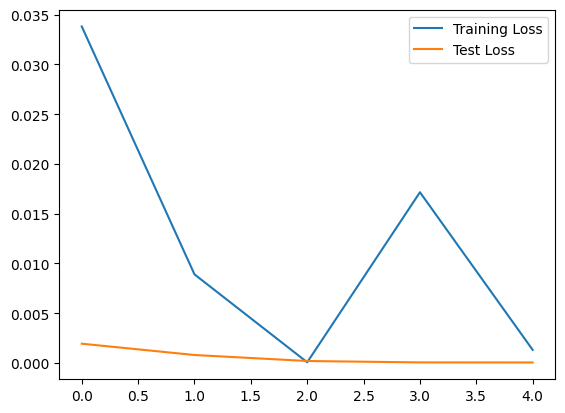

In [44]:
# Plotting the losses

plt.plot([tensor.detach().numpy() for tensor in train_losses], label = 'Training Loss')
plt.plot([tensor.detach().numpy() for tensor in test_losses], label = 'Test Loss')
plt.legend()

# .detach().numpy() is done to convert the pytorch tensor that requires grad to numpy array in order to plot using matplotlib

In [45]:
train_acc = [t/600 for t in train_correct]
test_acc = [t/100 for t in test_correct]

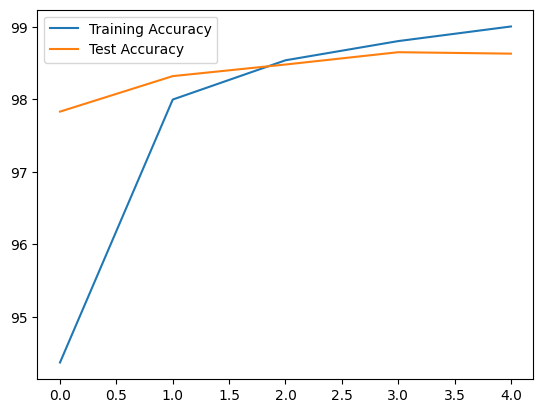

In [46]:
plt.plot([tensor.detach().numpy() for tensor in train_acc], label = 'Training Accuracy')
plt.plot([tensor.detach().numpy() for tensor in test_acc], label = 'Test Accuracy')
plt.legend()

In [47]:
# Testing with new unseen data

test_load_all = DataLoader(test_data, batch_size=10000, shuffle = False)


In [49]:
with torch.no_grad():
  correct = 0

  for X_test, y_test in test_load_all:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

In [50]:
print(f'Accuracy is : {correct.item()/len(y_test)}')

Accuracy is : 0.9863


In [51]:
confusion_matrix(predicted.view(-1), y_test.view(-1))

array([[ 972,    0,    1,    0,    0,    2,    6,    0,    4,    0],
       [   0, 1134,    1,    0,    1,    0,    4,    5,    1,    3],
       [   4,    0, 1013,    1,    1,    0,    1,    3,    1,    1],
       [   0,    0,    2, 1006,    0,   14,    0,    0,    1,    2],
       [   0,    0,    1,    0,  973,    0,    1,    0,    1,    8],
       [   0,    0,    0,    2,    0,  870,    4,    0,    1,    4],
       [   2,    0,    0,    0,    3,    2,  941,    0,    0,    0],
       [   1,    1,   13,    0,    0,    1,    0, 1017,    2,    9],
       [   0,    0,    1,    1,    0,    1,    1,    1,  961,    6],
       [   1,    0,    0,    0,    4,    2,    0,    2,    2,  976]])